In [96]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import matplotlib.ticker as mticker
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Configuración de estilo para gráficas
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("ANÁLISIS EXPLORATORIO DE DATOS")
print("Sistema de Control de Presión Arterial - EPS")
print("="*60)

ANÁLISIS EXPLORATORIO DE DATOS
Sistema de Control de Presión Arterial - EPS


In [54]:
# Cargar los datos
df = pd.read_csv('/content/drive/MyDrive/actividad2.csv', sep=',', encoding="ISO-8859-1", )

print(f"Base de datos cargada exitosamente:")
print(f"- Registros: {len(df):,}")
print(f"- Variables: {len(df.columns)}")
print(f"- Columnas: {list(df.columns)}")

Base de datos cargada exitosamente:
- Registros: 100,000
- Variables: 10
- Columnas: ['first_name', 'last_name', 'gender', 'city_name', 'department_name', 'id_branch', 'medicine_type', 'medicine_quantity', 'systolic_pressure', 'diastolic_pressure']


In [55]:
# 2. ESTRUCTURA DE LOS DATOS (equivalente a STR en R)
print("\n2. ESTRUCTURA DE LA BASE DE DATOS:")
print(df.info())
print("\nPrimeras 5 filas:")
print(df.head())


2. ESTRUCTURA DE LA BASE DE DATOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_name          100000 non-null  object
 1   last_name           100000 non-null  object
 2   gender              100000 non-null  object
 3   city_name           100000 non-null  object
 4   department_name     100000 non-null  object
 5   id_branch           100000 non-null  int64 
 6   medicine_type       100000 non-null  int64 
 7   medicine_quantity   100000 non-null  int64 
 8   systolic_pressure   100000 non-null  int64 
 9   diastolic_pressure  100000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 7.6+ MB
None

Primeras 5 filas:
  first_name last_name gender              city_name department_name  \
0     Meagan   Swanson      f                  Neiva           Huila   
1   Jennifer   Hancock      f                  T

In [73]:
df = df.rename(columns={
    'gender': 'GENERO',
    'city_name': 'CIUDAD',
    'department_name': 'DEPARTAMENTO',
    'medicine_quantity': 'CANTIDAD_MEDICAMENTO',
    'medicine_type': 'TIPO_MEDICINA',
    'systolic_pressure': 'PRESION_SISTOLICA',
    'diastolic_pressure': 'PRESION_DIASTOLICA'
})

In [56]:
print("\n3. CONVERSIÓN DE VARIABLES CATEGÓRICAS:")


3. CONVERSIÓN DE VARIABLES CATEGÓRICAS:


In [74]:

# Convertir variables categóricas
categorical_columns = ['GENERO', 'CIUDAD', 'DEPARTAMENTO']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
        print(f"- {col}: {df[col].nunique()} niveles únicos")

- GENERO: 2 niveles únicos
- CIUDAD: 32 niveles únicos
- DEPARTAMENTO: 32 niveles únicos


In [75]:
# Mostrar niveles de cada variable categórica
print("\nNiveles por variable:")
for col in categorical_columns:
    if col in df.columns:
        print(f"- {col}: {df[col].unique()}")


Niveles por variable:
- GENERO: ['f', 'm']
Categories (2, object): ['f', 'm']
- CIUDAD: ['Neiva', 'Tunja', 'Popayan', 'Bogota', 'San Jose del Guaviare', ..., 'Yopal', 'Quibdo', 'Manizales', 'Mocoa', 'Inirida']
Length: 32
Categories (32, object): ['Arauca', 'Armenia', 'Barranquilla', 'Bogota', ..., 'Tunja', 'Valledupar',
                          'Villavicencio', 'Yopal']
- DEPARTAMENTO: ['Huila', 'Boyaca', 'Cauca', 'Cundinamarca', 'Guaviare', ..., 'Casanare', 'Choco', 'Caldas', 'Putumayo', 'Guainia']
Length: 32
Categories (32, object): ['Amazonas', 'Antioquia', 'Arauca', 'Atlantico', ..., 'Tolima',
                          'Valle del Cauca', 'Vaupes', 'Vichada']


In [59]:

# 4. ANÁLISIS DE MEDIAS (equivalente al punto 8 de la guía)
print("\n4. ANÁLISIS DE MEDIAS POR GÉNERO:")


4. ANÁLISIS DE MEDIAS POR GÉNERO:


In [76]:
# Crear variables para presión sistólica y diastólica
presion_sistolica = df['PRESION_SISTOLICA'] if 'PRESION_SISTOLICA' in df.columns else df.iloc[:, -3]
presion_diastolica = df['PRESION_DIASTOLICA'] if 'PRESION_DIASTOLICA' in df.columns else df.iloc[:, -2]


In [78]:
# Calcular medias por género
if 'GENERO' in df.columns:
    medias_por_genero = df.groupby('GENERO').agg({
        'PRESION_SISTOLICA': 'mean',
        'PRESION_DIASTOLICA': 'mean',
        'CANTIDAD_MEDICAMENTO': 'mean'
    }).round(2)

    print("Medias por género:")
    print(medias_por_genero)

    print("\nInterpretación: Las medias son similares entre géneros, indicando")
    print("distribución homogénea de las variables por género.")


Medias por género:
        PRESION_SISTOLICA  PRESION_DIASTOLICA  CANTIDAD_MEDICAMENTO
GENERO                                                             
f                  128.46               80.54                150.84
m                  128.77               80.62                149.83

Interpretación: Las medias son similares entre géneros, indicando
distribución homogénea de las variables por género.



5. GENERANDO GRÁFICAS BOXPLOT...


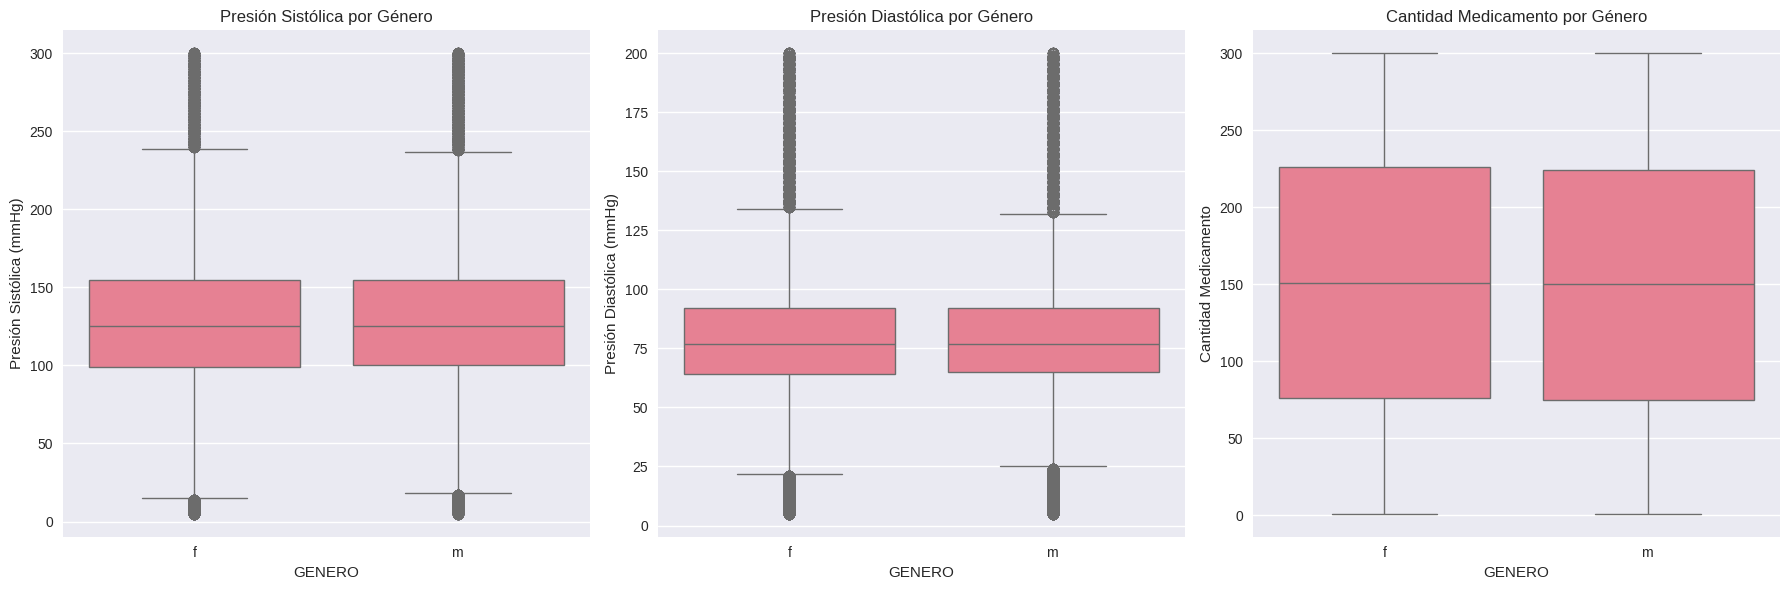

In [80]:

# 5. GRÁFICA BOXPLOT (equivalente al punto 9 de la guía)
print("\n5. GENERANDO GRÁFICAS BOXPLOT...")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot presión sistólica por género
if 'GENERO' in df.columns:
    sns.boxplot(data=df, x='GENERO', y='PRESION_SISTOLICA', ax=axes[0])
    axes[0].set_title('Presión Sistólica por Género')
    axes[0].set_ylabel('Presión Sistólica (mmHg)')

# Boxplot presión diastólica por género
if 'GENERO' in df.columns:
    sns.boxplot(data=df, x='GENERO', y='PRESION_DIASTOLICA', ax=axes[1])
    axes[1].set_title('Presión Diastólica por Género')
    axes[1].set_ylabel('Presión Diastólica (mmHg)')
# Boxplot cantidad medicamento por género
if 'GENERO' in df.columns:
    sns.boxplot(data=df, x='GENERO', y='CANTIDAD_MEDICAMENTO', ax=axes[2])
    axes[2].set_title('Cantidad Medicamento por Género')
    axes[2].set_ylabel('Cantidad Medicamento')

plt.tight_layout()
plt.show()



6. GENERANDO HISTOGRAMAS DE FRECUENCIAS...


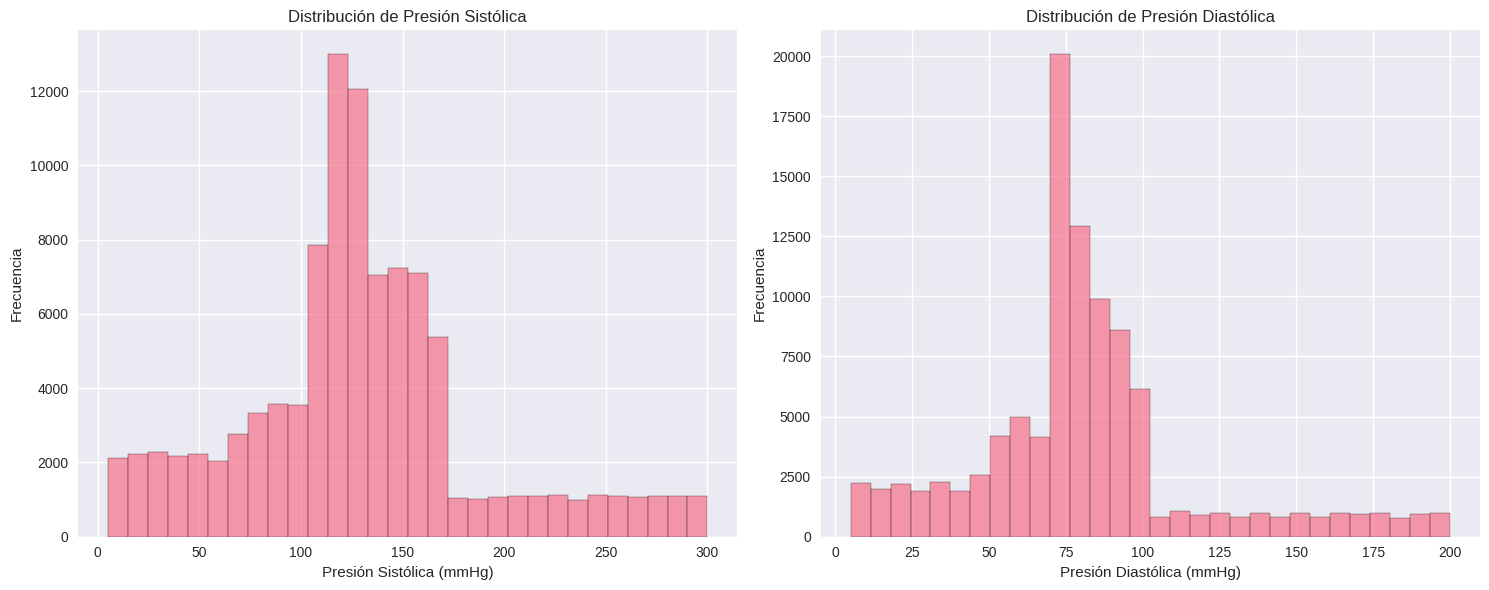

In [81]:

# 6. HISTOGRAMAS (equivalente al punto 10 de la guía)
print("\n6. GENERANDO HISTOGRAMAS DE FRECUENCIAS...")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma presión sistólica
axes[0].hist(df['PRESION_SISTOLICA'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribución de Presión Sistólica')
axes[0].set_xlabel('Presión Sistólica (mmHg)')
axes[0].set_ylabel('Frecuencia')

# Histograma presión diastólica
axes[1].hist(df['PRESION_DIASTOLICA'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_title('Distribución de Presión Diastólica')
axes[1].set_xlabel('Presión Diastólica (mmHg)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


7. GRÁFICA DE DISPERSIÓN CON MÚLTIPLES FACTORES...


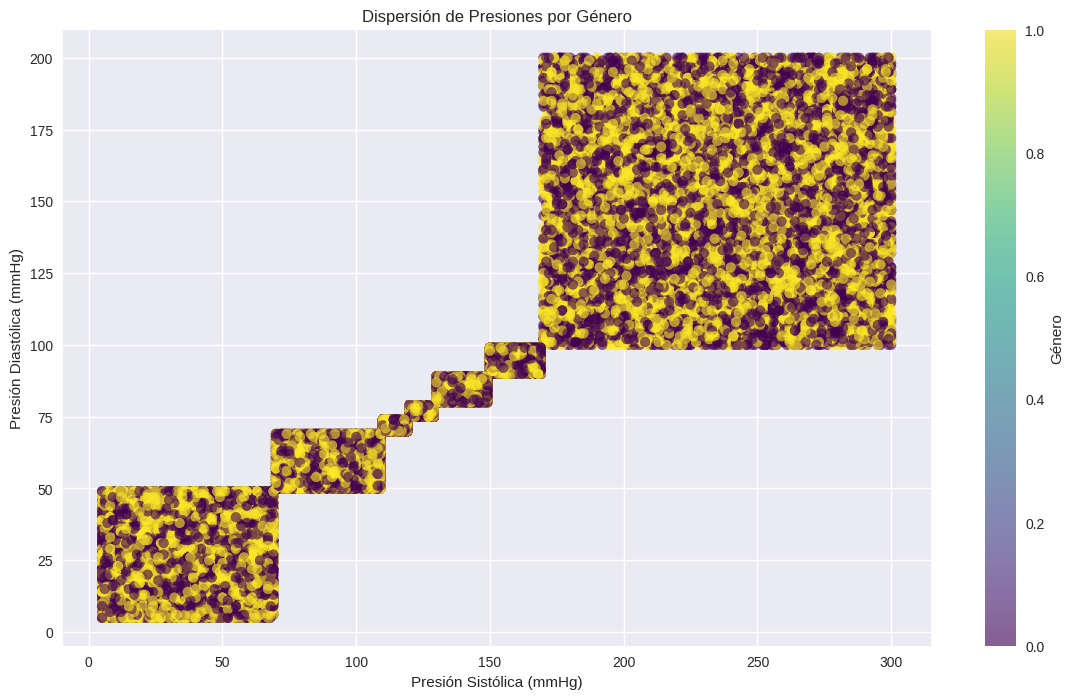

In [82]:

# 7. GRÁFICA DE DISPERSIÓN (equivalente al punto 12 de la guía)
print("\n7. GRÁFICA DE DISPERSIÓN CON MÚLTIPLES FACTORES...")

plt.figure(figsize=(14, 8))
scatter = plt.scatter(df['PRESION_SISTOLICA'], df['PRESION_DIASTOLICA'],
                     c=pd.Categorical(df['GENERO']).codes,
                     cmap='viridis', alpha=0.6)
plt.xlabel('Presión Sistólica (mmHg)')
plt.ylabel('Presión Diastólica (mmHg)')
plt.title('Dispersión de Presiones por Género')
plt.colorbar(scatter, label='Género')
plt.show()


8. ANÁLISIS POR DEPARTAMENTO Y GÉNERO...


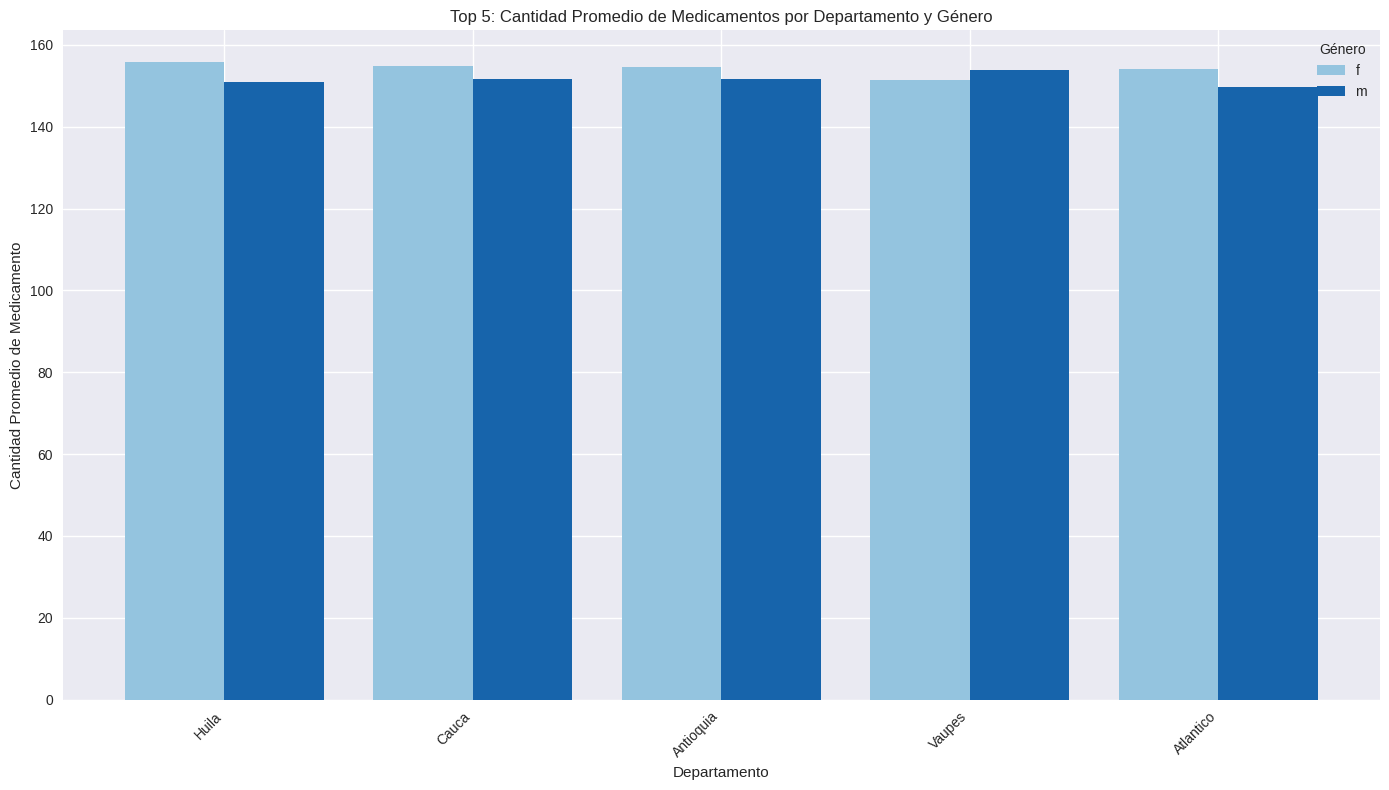

In [87]:

# 8. ANÁLISIS POR DEPARTAMENTO Y GÉNERO (equivalente al punto 13)
print("\n8. ANÁLISIS POR DEPARTAMENTO Y GÉNERO...")

if 'DEPARTAMENTO' in df.columns:
    medicamentos_dept_genero = df.groupby(['DEPARTAMENTO', 'GENERO'])['CANTIDAD_MEDICAMENTO'].mean().unstack()

    promedio_total = medicamentos_dept_genero.mean(axis=1)
    top5_departamentos = promedio_total.sort_values(ascending=False).head(5).index
    medicamentos_top5 = medicamentos_dept_genero.loc[top5_departamentos]

    # Crear paleta de azules según número de géneros
    num_generos = medicamentos_top5.shape[1]
    colores_azules = cm.Blues(np.linspace(0.4, 0.8, num_generos))

    # Graficar con colores personalizados
    medicamentos_top5.plot(kind='bar', width=0.8, color=colores_azules, figsize=(14, 8))
    plt.title('Top 5: Cantidad Promedio de Medicamentos por Departamento y Género')
    plt.xlabel('Departamento')
    plt.ylabel('Cantidad Promedio de Medicamento')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Género')
    plt.tight_layout()
    plt.show()


9. CATEGORIZACIÓN SEGÚN RANGOS DE PRESIÓN ARTERIAL...

Distribución por categoría de presión arterial:
CATEGORIA_PRESION
Hipotensión             14411
Normal                  14405
Hipertensión Grado 2    14341
Hipertensión Grado 3    14327
Pre hipertensión        14251
Hipertensión Grado 1    14244
Óptima                  14021
Name: count, dtype: int64


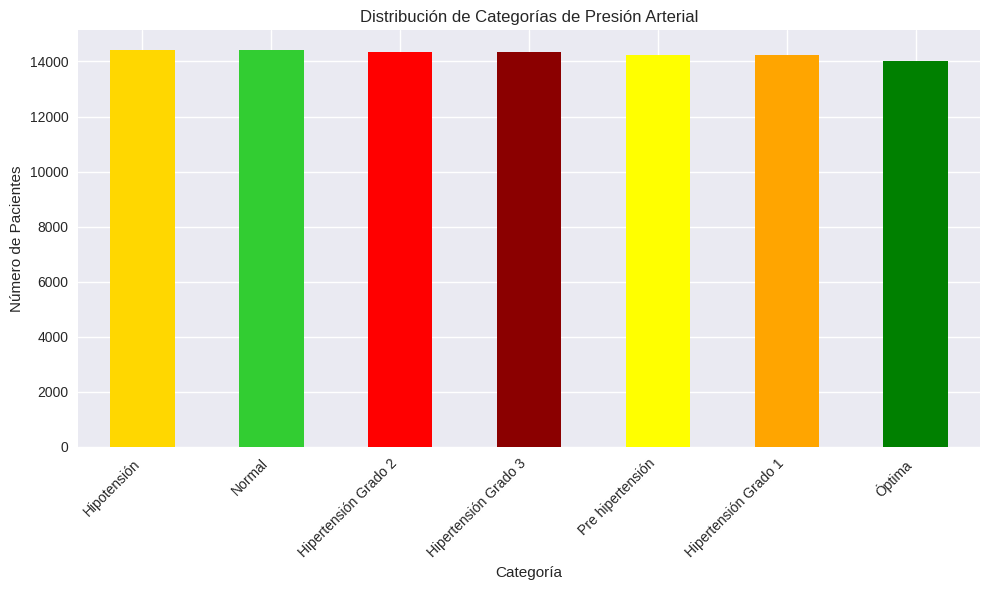

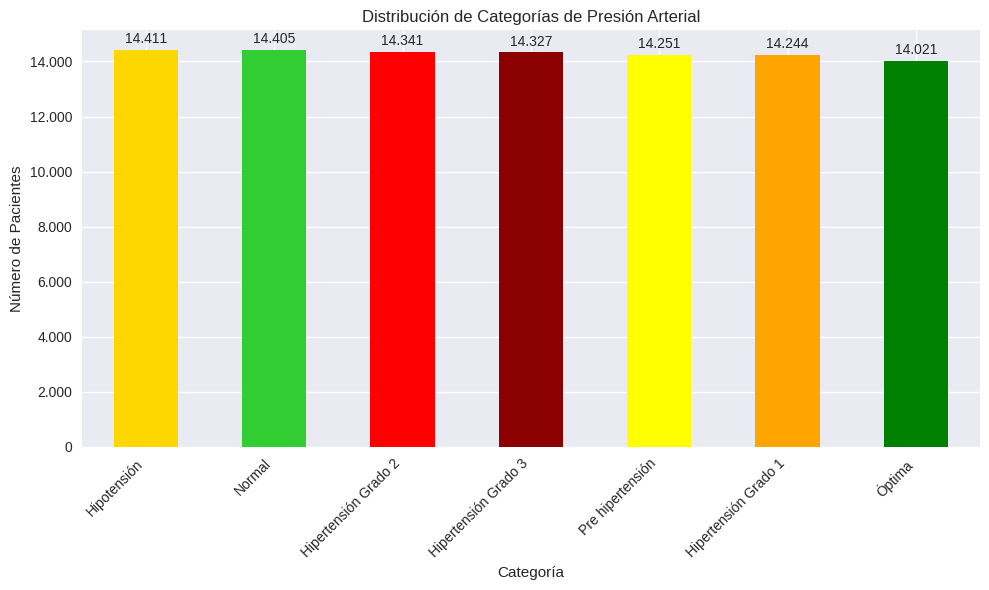

In [100]:
# 9. CATEGORIZACIÓN SEGÚN RANGOS DE PRESIÓN (nuevo análisis)
print("\n9. CATEGORIZACIÓN SEGÚN RANGOS DE PRESIÓN ARTERIAL...")

def categorizar_presion(sistolica, diastolica):
    """Categoriza la presión arterial según los rangos definidos"""
    if sistolica < 70 and diastolica < 50:
        return 'Hipotensión', 'Amarilla'
    elif 70 <= sistolica < 110 and 50 <= diastolica < 70:
        return 'Óptima', 'Verde'
    elif 110 <= sistolica < 120 and 70 <= diastolica < 75:
        return 'Normal', 'Verde'
    elif 120 <= sistolica < 130 and 75 <= diastolica < 80:
        return 'Pre hipertensión', 'Amarilla'
    elif 130 <= sistolica < 150 and 80 <= diastolica < 90:
        return 'Hipertensión Grado 1', 'Naranja'
    elif 150 <= sistolica < 170 and 90 <= diastolica < 100:
        return 'Hipertensión Grado 2', 'Roja'
    elif sistolica >= 170 and diastolica >= 100:
        return 'Hipertensión Grado 3', 'Roja'
    elif sistolica >= 130 and diastolica < 80:
        return 'Hipertensión Solo Sistólica', 'Naranja'
    else:
        return 'Sin categorizar', 'Gris'

# Aplicar la función si las columnas existen
if 'PRESION_SISTOLICA' in df.columns and 'PRESION_DIASTOLICA' in df.columns:
    df[['CATEGORIA_PRESION', 'COLOR_PRESION']] = df.apply(
        lambda row: pd.Series(categorizar_presion(row['PRESION_SISTOLICA'], row['PRESION_DIASTOLICA'])),
        axis=1
    )

    # Verificar distribución
    resumen = df['CATEGORIA_PRESION'].value_counts().sort_values(ascending=False)
    print("\nDistribución por categoría de presión arterial:")
    print(resumen)

    # Colores personalizados
    colores = {
        'Hipotensión': 'gold',
        'Óptima': 'green',
        'Normal': 'limegreen',
        'Pre hipertensión': 'yellow',
        'Hipertensión Grado 1': 'orange',
        'Hipertensión Grado 2': 'red',
        'Hipertensión Grado 3': 'darkred',
        'Hipertensión Solo Sistólica': 'orangered',
        'Sin categorizar': 'gray'
    }

    # Graficar
    plt.figure(figsize=(10, 6))
    resumen.plot(kind='bar', color=[colores.get(cat, 'gray') for cat in resumen.index])
    plt.title('Distribución de Categorías de Presión Arterial')
    plt.xlabel('Categoría')
    plt.ylabel('Número de Pacientes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Las columnas 'SISTOLICA' y 'DIASTOLICA' no están presentes en el DataFrame.")


# Crear figura
plt.figure(figsize=(10, 6))

# Graficar barras
ax = resumen.plot(kind='bar', color=[colores.get(cat, 'gray') for cat in resumen.index])

# Título y etiquetas
plt.title('Distribución de Categorías de Presión Arterial')
plt.xlabel('Categoría')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right')

# Formatear eje Y con punto como separador de miles
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Agregar etiquetas encima de cada barra
for i, value in enumerate(resumen):
    ax.text(i, value + max(resumen)*0.01, f'{value:,}'.replace(',', '.'), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


Distribución de categorías de presión arterial:
CATEGORIA
Hipotensión             14411
Normal                  14405
Hipertensión Grado 2    14341
Hipertensión Grado 3    14327
Pre hipertensión        14251
Hipertensión Grado 1    14244
Óptima                  14021
Name: count, dtype: int64


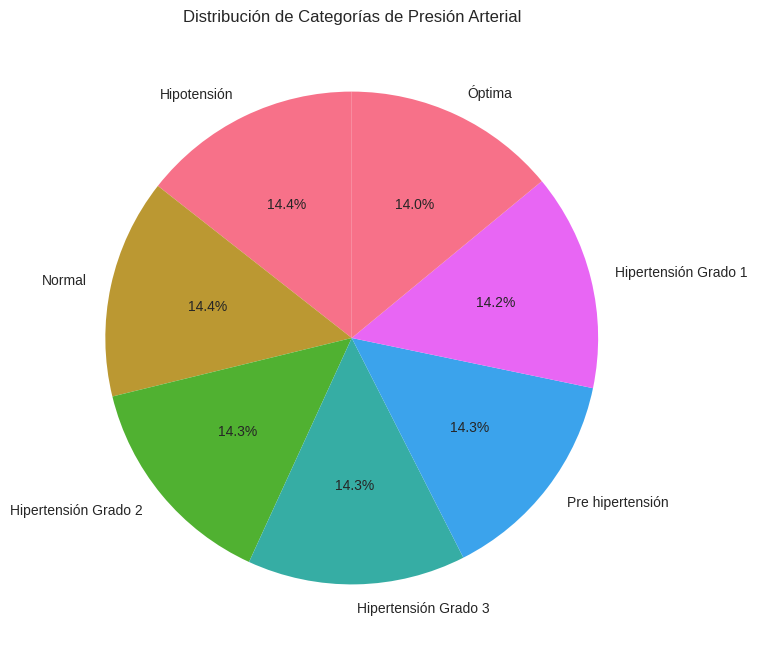

In [102]:
# Aplicar categorización
df[['CATEGORIA', 'ALERTA']] = df.apply(lambda row: pd.Series(
    categorizar_presion(row['PRESION_SISTOLICA'], row['PRESION_DIASTOLICA'])), axis=1)

# Distribución de categorías
print("Distribución de categorías de presión arterial:")
categoria_dist = df['CATEGORIA'].value_counts()
print(categoria_dist)

# Gráfica de distribución de categorías
plt.figure(figsize=(12, 8))
categoria_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Categorías de Presión Arterial')
plt.ylabel('')
plt.show()



In [103]:
# 10. ANÁLISIS DE VARIANZA - ANOVA (equivalente al punto 14)
print("\n10. ANÁLISIS DE VARIANZA (ANOVA)...")

# ANOVA para presión sistólica vs tipo de medicina
if 'TIPO_MEDICINA' in df.columns:
    grupos_medicina = [group['PRESION_SISTOLICA'].values
                      for name, group in df.groupby('TIPO_MEDICINA')]

    f_stat_sistolica, p_value_sistolica = stats.f_oneway(*grupos_medicina)

    print(f"ANOVA - Presión Sistólica vs Tipo de Medicina:")
    print(f"F-estadístico: {f_stat_sistolica:.4f}")
    print(f"Valor p: {p_value_sistolica:.6f}")

    if p_value_sistolica < 0.05:
        print("✓ Diferencias significativas (p < 0.05)")
    else:
        print("✗ No hay diferencias significativas (p >= 0.05)")

    # ANOVA para presión diastólica vs tipo de medicina
    grupos_medicina_diast = [group['PRESION_DIASTOLICA'].values
                           for name, group in df.groupby('TIPO_MEDICINA')]

    f_stat_diastolica, p_value_diastolica = stats.f_oneway(*grupos_medicina_diast)

    print(f"\nANOVA - Presión Diastólica vs Tipo de Medicina:")
    print(f"F-estadístico: {f_stat_diastolica:.4f}")
    print(f"Valor p: {p_value_diastolica:.6f}")

    if p_value_diastolica < 0.05:
        print("✓ Diferencias significativas (p < 0.05)")
    else:
        print("✗ No hay diferencias significativas (p >= 0.05)")



10. ANÁLISIS DE VARIANZA (ANOVA)...
ANOVA - Presión Sistólica vs Tipo de Medicina:
F-estadístico: 0.8331
Valor p: 0.668629
✗ No hay diferencias significativas (p >= 0.05)

ANOVA - Presión Diastólica vs Tipo de Medicina:
F-estadístico: 0.6730
Valor p: 0.849251
✗ No hay diferencias significativas (p >= 0.05)



11. ESTADÍSTICAS DESCRIPTIVAS COMPLETAS:

Estadísticas de las variables numéricas:
       id_branch  TIPO_MEDICINA  CANTIDAD_MEDICAMENTO  PRESION_SISTOLICA  \
count  100000.00      100000.00             100000.00          100000.00   
mean       16.46          10.47                150.34             128.62   
std         9.23           5.76                 86.44              59.28   
min         1.00           1.00                  1.00               5.00   
25%         8.00           5.00                 75.00             100.00   
50%        16.00          10.00                150.00             125.00   
75%        24.00          15.00                225.00             155.00   
max        32.00          20.00                300.00             300.00   

       PRESION_DIASTOLICA  
count           100000.00  
mean                80.58  
std                 36.82  
min                  5.00  
25%                 65.00  
50%                 77.00  
75%                 92.00  
max    

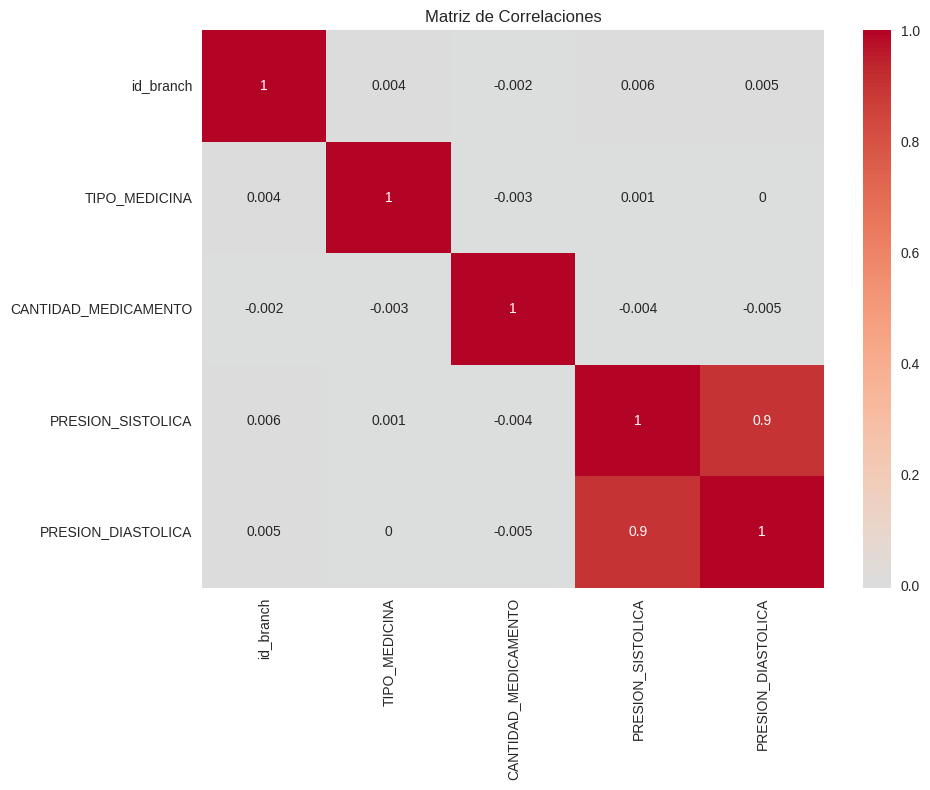

In [104]:
# 11. ESTADÍSTICAS DESCRIPTIVAS ADICIONALES
print("\n11. ESTADÍSTICAS DESCRIPTIVAS COMPLETAS:")
print("\nEstadísticas de las variables numéricas:")
print(df.describe().round(2))

# Correlaciones
print("\nMatriz de correlaciones:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr().round(3)
print(correlation_matrix)

# Visualización de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlaciones')
plt.tight_layout()
plt.show()


In [105]:
# 12. ANÁLISIS POR REGIÓN
print("\n12. ANÁLISIS POR REGIÓN (DEPARTAMENTO)...")

if 'DEPARTAMENTO' in df.columns:
    region_analysis = df.groupby('DEPARTAMENTO').agg({
        'PRESION_SISTOLICA': ['mean', 'std', 'count'],
        'PRESION_DIASTOLICA': ['mean', 'std'],
        'CANTIDAD_MEDICAMENTO': ['mean', 'sum']
    }).round(2)

    print("Análisis por departamento:")
    print(region_analysis)

print("\n" + "="*60)
print("ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*60)

# Resumen final
print(f"\nRESUMEN EJECUTIVO:")
print(f"- Total de pacientes analizados: {len(df):,}")
print(f"- Presión sistólica promedio: {df['PRESION_SISTOLICA'].mean():.1f} mmHg")
print(f"- Presión diastólica promedio: {df['PRESION_DIASTOLICA'].mean():.1f} mmHg")
print(f"- Medicamento promedio por paciente: {df['CANTIDAD_MEDICAMENTO'].mean():.1f}")

if 'CATEGORIA' in df.columns:
    print(f"- Categoría más común: {df['CATEGORIA'].value_counts().index[0]}")
    print(f"- Pacientes en riesgo alto (Alerta Roja): {len(df[df['ALERTA'] == 'Roja']):,}")



12. ANÁLISIS POR REGIÓN (DEPARTAMENTO)...
Análisis por departamento:
                         PRESION_SISTOLICA              PRESION_DIASTOLICA  \
                                      mean    std count               mean   
DEPARTAMENTO                                                                 
Amazonas                            128.66  57.44  3213              80.52   
Antioquia                           126.87  58.47  3149              79.98   
Arauca                              127.07  59.54  3213              79.44   
Atlantico                           127.59  59.38  3157              80.24   
Bolivar                             128.03  59.26  3129              80.02   
Boyaca                              129.05  60.28  3041              81.20   
Caldas                              128.25  58.85  3162              80.57   
Caqueta                             128.50  59.23  3118              81.34   
Casanare                            129.70  59.72  3193              81.